# Exploratory Data Analysis (EDA) of Brent Oil Prices

This notebook focuses on analyzing the time series properties of Brent oil prices, including trend and stationarity, as part of Task 1.2.b of the project.

### Load Data and Basic Information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load the data
file_path = '../data/raw/brent_oil_prices.csv'
raw_df = pd.read_csv(file_path)

# Display basic information
print(raw_df.head())
print(raw_df.info())
print(raw_df.describe())


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


### Convert Date, Set Index, and Plot

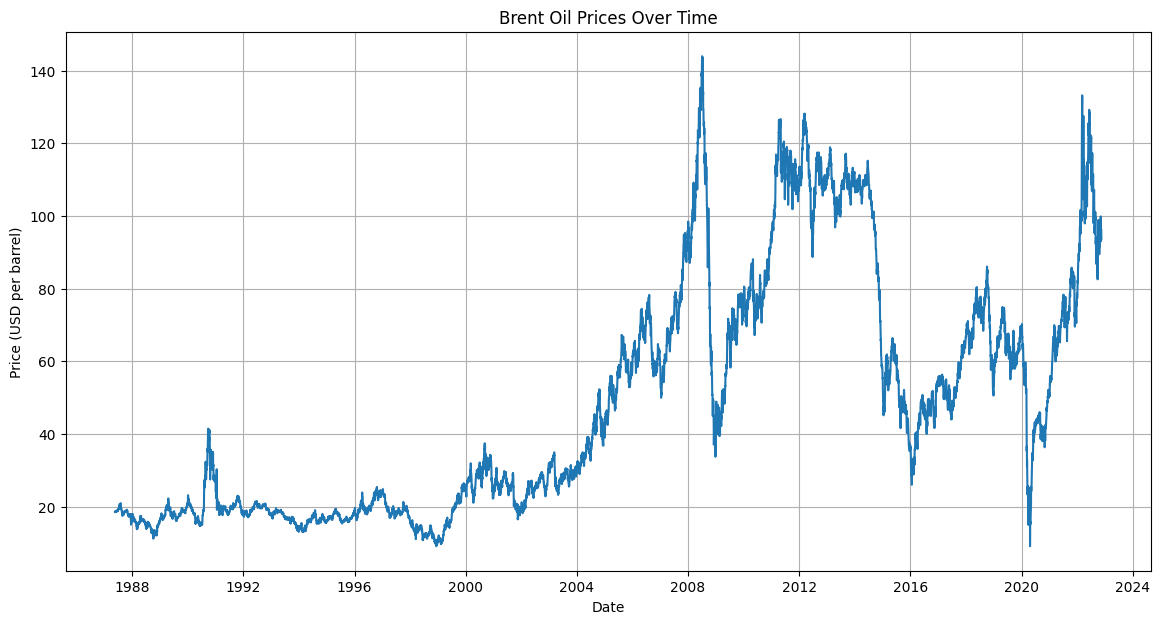

In [4]:
# Convert 'Date' column to datetime objects with mixed formats
raw_df['Date'] = pd.to_datetime(raw_df['Date'], format='mixed')

# Set 'Date' as index
raw_df.set_index('Date', inplace=True)

# Sort by date to ensure time series order
raw_df.sort_index(inplace=True)

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(raw_df['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.show()


### ADF Test for Stationarity

In [5]:
# Check for stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

check_stationarity(raw_df['Price'])


Results of Dickey-Fuller Test:
Test Statistic                   -1.993856
p-value                           0.289274
#Lags Used                       29.000000
Number of Observations Used    8981.000000
Critical Value (1%)              -3.431078
Critical Value (5%)              -2.861862
Critical Value (10%)             -2.566941
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


### Modeling Implications

Discuss how these properties inform modeling choices (to be filled in after running the notebook).
